# Comp6481 / 8481 coursework 2024 

We will be working with data from https://www.kaggle.com/datasets/sethpoly/application-rejection-emails 

*Detect Reject Emails* by SethPoly@kaggle


# Part A

This notebook contains the questions for Part A of the practical coursework. 

Please ensure that this notebook is stored in a folder which also has the `Rejection Data - Sheet1.csv` data file

When you answer these questions, include in your submission for Part A your answers and the code that you used. 

The most straightforward way to do this is to complete Part A within this Jupyter notebook. *Please add your answers and code per question in the indicated cells.*

You can instead submit a separate python file for Part A if this is preferable for you, but remember to include:
* your code 
* comments that: 
 * clearly indicate which question each code snippet relates to, 
 * contain the answer to that question.

Part A is worth 20 marks in total. Each question is annotated with the number of marks that question is worth. In each question, half the marks are awarded for the code and half the marks are awarded for correct answers to the question.

***Cells are provided for you to complete your answers in this notebook. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***

You are welcome to extend this notebook also for your Part B work, though you could also use a different notebook or python file. Please add any working for Part B at the end of this notebook if you wish to use this notebook for Part B work too.


**************************************************************************************
* Start of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
* The majority of code extracted from the original notebook is commented out below, but included for completeness
**************************************************************************************

# Detect Reject emails

Author: Sethpoly@kaggle

Link: https://www.kaggle.com/code/sethpoly/detect-reject-emails

## Used to detect the rejection emails from jobs applied to.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv).
from gensim.models import Word2Vec
import nltk

df = pd.read_csv('Rejection Data - Sheet1.csv')
df.tail()

,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth,\n\nI want to make finding a great rem...",not_reject
126,"Hello Seth,\n\nI just wanted to take a second ...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,\nSupport resources for developers at all leve...,not_reject


In [2]:
import string
import matplotlib.pyplot as plt
import nltk


# For the purposes of this assessment, all text processing actions in this cell have been removed except the replacement of newline characters by space characters

# convert email text to lowercase
#df.Email = df.Email.apply(lambda x: x.lower())
# remove punctuation
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))
# remove numbers
#df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))
# remove newline tags
df.Email = df.Email.apply(lambda x: x.translate(str.maketrans('\n',' ')))
df.tail()



,Email,Status
124,"Starting March 17, 2021, eBay will no longer ...",not_reject
125,"Hi Seth, I want to make finding a great remot...",not_reject
126,"Hello Seth, I just wanted to take a second to...",not_reject
127,Your free YouMail plan includes 20 in-app tran...,not_reject
128,Support resources for developers at all level...,not_reject


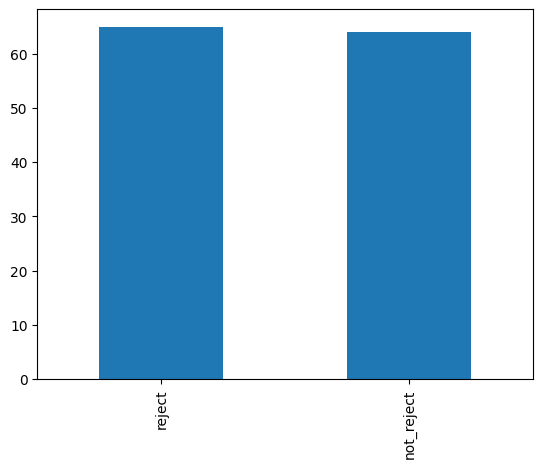

In [3]:
df.Status.value_counts().plot(kind='bar')
plt.show()

In [4]:
# Add a column 'Tokens' to df, to hold the email contents as a list of tokens
df['Tokens'] = [nltk.word_tokenize(e) for e in df.Email]

print(df.Tokens[0])

['Thank', 'you', 'for', 'applying', 'to', 'the', 'Junior', 'Software', 'Developer', 'position', 'at', 'MSC', 'Technology', '.', 'Unfortunately', ',', 'MSC', 'Technology', 'has', 'moved', 'to', 'the', 'next', 'step', 'in', 'their', 'hiring', 'process', ',', 'and', 'your', 'application', 'was', 'not', 'selected', 'at', 'this', 'time', '.']


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#pull data into vectors to create collection of text/tokens
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df.Email)

encoder = LabelEncoder()
y = encoder.fit_transform(df.Status)

#split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#Shape of sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(103, 1804)
(103,)
(26, 1804)
(26,)


In [6]:
%%time
nb = MultinomialNB()
nb.fit(x_train, y_train)

CPU times: total: 0 ns
Wall time: 1.57 ms


MultinomialNB()

In [7]:
def predict_reject(email):
   category_names = {'reject':'reject','not_reject':'not-reject'}
   cod = nb.predict(vectorizer.transform([email]))
   return category_names[encoder.inverse_transform(cod)[0]]

print(predict_reject('Unfortunately we will not be moving forward'))
print(predict_reject('I found some job listings you may be interested in'))
print(predict_reject('We were very fortunate to have a strong group of applicants to consider for this role and have recently filled this position. Unfortunately, because this role is no longer available, we will not be moving forward with your application.'))
print(predict_reject(''))


reject
not-reject
reject
reject


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#Init the classfifier
clf = OneVsRestClassifier(LogisticRegression())

#Fit classifier to training data
clf.fit(x_train, y_train)

#Print accuracy
print(f'Accuracy: {clf.score(x_test, y_test)}')

Accuracy: 0.8076923076923077


In [9]:
x_test_clv_pred = clf.predict(x_test)
confusion_matrix(y_test, x_test_clv_pred)
print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

  not_reject       1.00      0.69      0.81        16
      reject       0.67      1.00      0.80        10

    accuracy                           0.81        26
   macro avg       0.83      0.84      0.81        26
weighted avg       0.87      0.81      0.81        26



 - Inspiration and code samples from https://towardsdatascience.com/i-built-a-reject-not-reject-email-classifier-for-my-job-applications-844a3b6cd67e

**************************************************************************************
* End of code adapted from https://www.kaggle.com/code/sethpoly/detect-reject-emails
**************************************************************************************

# Coursework questions for Part A:

For each question, please add your code to the empty code cell below the question, and please add any written answers/comments to the empty markdown cell below the question, as indicated. 

***You are allowed to add additional code markdown cells as needed below this point. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***


## Q1 [2 marks]

Add a column to the `df` data frame named `Length`, which holds the number of tokens in the tokenised list representing that email (i.e. the number of items in the list in `df.Tokens` for each row)

In [10]:
# Answer to Q1
df['Length'] = df['Tokens'].apply(len)

In [11]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['Length'])

0       39
1       47
2      139
3       49
4       81
      ... 
124    133
125     87
126     58
127     34
128    146
Name: Length, Length: 129, dtype: int64


## Q2. 

### Q2a [2 marks] 

Choose an appropriate visualisation to create a visualisation of the Length and Status data in `df`, after you have completed Q1.

You can consult the lectures on visualisation and also use the following docs to help guide you and give you inspiration:

https://matplotlib.org/stable/plot_types/basic/index.html
https://realpython.com/pandas-plot-python/
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
https://www.w3schools.com/python/matplotlib_intro.asp

### Q2b [2 marks] 

Give a brief comment in the markdown box below about why you have chosen the visualisation you did, with reference to the type of data you are visualising.

Add a comment answering the question: "Do you see any patterns in your visualisation of the data frame data on email Length and email Status?"

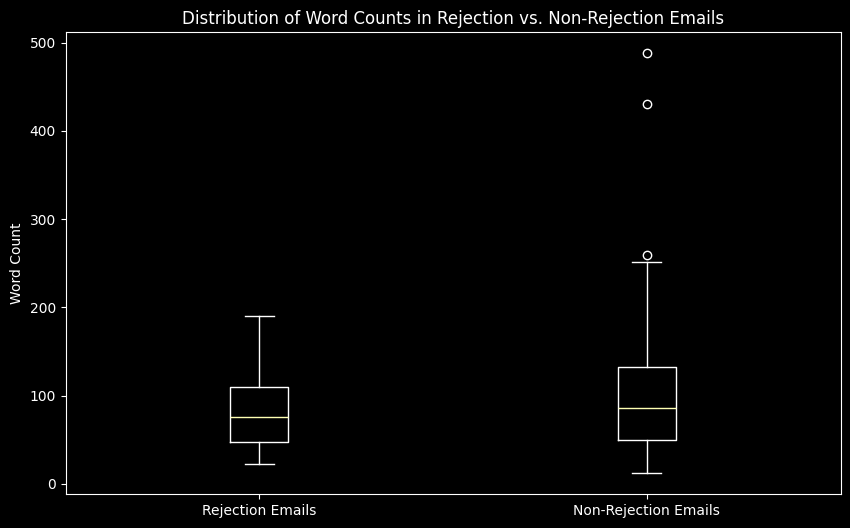

In [12]:
avg_lengths = df.groupby('Status')['Length'].mean()
data_to_plot = [df[df['Status']=='reject']['Length'], df[df['Status']=='not_reject']['Length']]
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Rejection Emails', 'Non-Rejection Emails'])
plt.title('Distribution of Word Counts in Rejection vs. Non-Rejection Emails')
plt.ylabel('Word Count')
plt.show()


Write your answer to Q2b here:

I chose to use a box plot because it is a simple but effective way to see not just the average range but also the total range between the lengths of emails within each caterogry and also compare them.
There is a clear pattern in the sence that both emails have a similar avereage around 100 however the non rejection emails have a signfinicaly higher upper word count than the rejection and a higher average overall


## Q3. [4 marks] 

We have defined a measure of `lexical richness` as: the number of unique tokens in a text, divided by the total number of tokens in that text. 

[We have also defined a second measure: how many times, on average, is each token used in the text? We will *not* use that measure here.]

Add a column to the data frame `df` named `LexRich`, which calculates the lexical richness for each email in the dataset.



In [13]:
# Answer for Q3
def lexical_richness(tokens):
    if len(tokens) > 0:
        return len(set(tokens)) / len(tokens)
    else:
        return 0

df['LexRich'] = df['Tokens'].apply(lexical_richness)

In [14]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(df['LexRich'])

0      0.820513
1      0.765957
2      0.669065
3      0.673469
4      0.703704
         ...   
124    0.556391
125    0.735632
126    0.793103
127    0.794118
128    0.719178
Name: LexRich, Length: 129, dtype: float64


## Q4. 

For Q4a and Q4b, note that we can access all the data in df with the Status = 'reject', using this code:

print(df[df.Status=='reject'])

###  Q4a: [4 marks] 

Calculate two variables, `lex_reject` and `lex_not_reject`
* `lex_reject' = the mean lexical richness for the `reject' emails
* `lex_not_reject' = the mean lexical richness for the `not_reject' emails

###  Q4b: [2 marks] 
Comment briefly on the difference: what does this tell us about how the variety of vocabulary use differs between reject emails and not_reject emails? [approx 2-4 sentences]

In [15]:
# We can access all the data in df with the Status = 'reject', using this code:
# print(df[df.Status=='reject'])

In [16]:
# Answer for Q4a
lex_reject = df[df.Status=='reject']['LexRich'].mean()
lex_not_reject = df[df.Status!='reject']['LexRich'].mean()

In [17]:
#Do not edit this cell, except that you can uncomment the line below for testing your answer to this question
print(lex_reject)
print(lex_not_reject)

0.7224843001105477
0.7282174937343919


Write your answer for Q4b here:

The lexical richness scores suggest that the range of vocabulary used within the eamils were very similar. However, not reject has a slightly higher richness of .728 vs rejects .722 suggesting that "not reject" tend to use a slightly wider range of vocabulary compared to that of "reject". 

## Q5. [4 marks]

Train a Word2Vec model called `model` using the following input parameters:
* `sentences` as the data in `df.Tokens`
* a `vector_size` of 100
* a `window` of 5
* a `min_count` of 1
* a `workers` of 4

Using your Word2Vec `model`, list the top 20 most similar tokens to the token `developer`.

In [18]:
# Answer to Q5 
model = Word2Vec(sentences=df['Tokens'], vector_size=100, window=5, min_count=1, workers=4)


In [19]:
similar_tokens = model.wv.most_similar('developer', topn=20)

#print the tokens
for token, similarity in similar_tokens:
    print(f"{token}: {similarity}")

1: 0.9170181751251221
want: 0.9139006733894348
move: 0.912597119808197
visit: 0.9116929173469543
reviewed: 0.9114440679550171
any: 0.9112985730171204
ago: 0.9110081791877747
been: 0.9110031723976135
but: 0.9107151031494141
clients: 0.9106860160827637
what: 0.9105873107910156
consider: 0.9104276895523071
experience: 0.9102237224578857
also: 0.9100909233093262
one: 0.9100781679153442
position: 0.9100679755210876
success: 0.9099695682525635
how: 0.9099376797676086
fit: 0.9099097847938538
interest: 0.9098953008651733


# End of Part A

If you wish to use this notebook for any code or calculations for Part B, please do so by adding cells below here.

In [20]:
from gensim.models import Word2Vec

tokens = df['Tokens'].tolist()

#train a Word2Vec model
model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

#list of terms
terms = ["developer", "interview", "skills", "offer", "application"]

#print the most similar words to each term
for term in terms:
    print(f"Most similar words to '{term}':")
    try:
        similar_words = model.wv.most_similar(term, topn=10)
        for word, similarity in similar_words:
            print(f"  {word}: {similarity:.4f}")
    except KeyError:
        print(f"  The term '{term}' is not in the vocabulary.")
    print("\n")

Most similar words to 'developer':
  1: 0.9168
  want: 0.9137
  move: 0.9124
  visit: 0.9115
  reviewed: 0.9112
  any: 0.9111
  ago: 0.9108
  been: 0.9108
  but: 0.9105
  clients: 0.9105


Most similar words to 'interview':
  like: 0.9771
  candidate: 0.9749
  |: 0.9748
  qualifications: 0.9747
  about: 0.9744
  by: 0.9744
  future: 0.9744
  as: 0.9743
  s: 0.9743
  new: 0.9743


Most similar words to 'skills':
  ): 0.9919
  .: 0.9919
  our: 0.9919
  and: 0.9919
  be: 0.9918
  Please: 0.9918
  from: 0.9918
  will: 0.9918
  ,: 0.9917
  we: 0.9917


Most similar words to 'offer':
  job: 0.9744
  (: 0.9738
  team: 0.9738
  will: 0.9736
  email: 0.9734
  other: 0.9733
  or: 0.9732
  openings: 0.9732
  can: 0.9732
  jobs: 0.9732


Most similar words to 'application':
  .: 0.9994
  your: 0.9993
  to: 0.9993
  ,: 0.9993
  the: 0.9993
  of: 0.9993
  :: 0.9993
  have: 0.9993
  and: 0.9992
  you: 0.9992




In [21]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


#preprocess text and tokenize
stop_words = set(stopwords.words('english') + list(string.punctuation))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return [token for token in tokens if token not in stop_words and token.isalpha()]  #remove punctuation

df['Tokens'] = df['Email'].apply(preprocess_text)

In [22]:
from collections import Counter

#separate tokens by email status
reject_tokens = df[df['Status'] == 'reject']['Tokens'].sum()
not_reject_tokens = df[df['Status'] == 'not_reject']['Tokens'].sum()

#calculate word frequencies
reject_freq = Counter(reject_tokens)
not_reject_freq = Counter(not_reject_tokens)

#the most common words in each category
most_common_reject = reject_freq.most_common(10)
most_common_not_reject = not_reject_freq.most_common(10)

print("Most common words in reject emails:", most_common_reject)
print("Most common words in not_reject emails:", most_common_not_reject)


Most common words in reject emails: [('interest', 79), ('thank', 68), ('position', 58), ('time', 56), ('unfortunately', 53), ('software', 47), ('application', 35), ('forward', 34), ('engineer', 31), ('best', 31)]
Most common words in not_reject emails: [('software', 44), ('please', 31), ('engineer', 29), ('resume', 28), ('application', 27), ('team', 26), ('thank', 26), ('job', 26), ('us', 23), ('get', 22)]


In [23]:
# nltk.download('vader_lexicon') #may need to be uncommoented if you haven't downloaded the vader lexicon before
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['Sentiment'] = df['Email'].apply(lambda x: sia.polarity_scores(x)['compound'])

#calculate average sentiment for each category
avg_sentiment_reject = df[df['Status'] == 'reject']['Sentiment'].mean()
avg_sentiment_not_reject = df[df['Status'] == 'not_reject']['Sentiment'].mean()

print("Average sentiment in reject emails:", avg_sentiment_reject)
print("Average sentiment in not_reject emails:", avg_sentiment_not_reject)


Average sentiment in reject emails: 0.7723276923076923
Average sentiment in not_reject emails: 0.712409375


In [24]:
#calculate the word count for each email
df['WordCount'] = df['Email'].apply(lambda x: len(word_tokenize(x)))

#separate the data into two groups: rejection and non-rejection emails
reject_df = df[df['Status'] == 'reject']
not_reject_df = df[df['Status'] == 'not_reject']

#calculate the average word count for each group
average_word_count_reject = reject_df['WordCount'].mean()
average_word_count_not_reject = not_reject_df['WordCount'].mean()

print(f"Average word count for rejection emails: {average_word_count_reject}")
print(f"Average word count for non-rejection emails: {average_word_count_not_reject}")


Average word count for rejection emails: 80.3076923076923
Average word count for non-rejection emails: 106.21875


In [25]:
future_action_keywords = ["apply again", "future", "opportunities", "keep in touch", "update", "progress"]

#count occurrences of future action keywords
def count_future_action_keywords(text, keyword_list):
    count = 0
    for keyword in keyword_list:
        # We'll use a simple count of keyword occurrences for this example
        count += text.lower().count(keyword)
    return count


df['FutureActionKeywordCount'] = df['Email'].apply(lambda x: count_future_action_keywords(x, future_action_keywords))

#seperate data
reject_keyword_count = df[df['Status'] == 'reject']['FutureActionKeywordCount'].sum()
not_reject_keyword_count = df[df['Status'] == 'not_reject']['FutureActionKeywordCount'].sum()

#calculate total and proportions
total_reject_emails = df[df['Status'] == 'reject'].shape[0]
total_not_reject_emails = df[df['Status'] == 'not_reject'].shape[0]

reject_proportion = reject_keyword_count / total_reject_emails
not_reject_proportion = not_reject_keyword_count / total_not_reject_emails

print(f"Total future action keywords in rejection emails: {reject_keyword_count}")
print(f"Total future action keywords in non-rejection emails: {not_reject_keyword_count}")
print(f"Average future action keywords per rejection email: {reject_proportion}")
print(f"Average future action keywords per non-rejection email: {not_reject_proportion}")

Total future action keywords in rejection emails: 48
Total future action keywords in non-rejection emails: 14
Average future action keywords per rejection email: 0.7384615384615385
Average future action keywords per non-rejection email: 0.21875
